## Surprise Housing Predicting Sale of Houses in Australia using Linear, Ridge and Lasso Regression

<br>The solution is divided into the following sections:<br>

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building
- Model evaluation

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler


import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

%matplotlib inline

### Loading Data

In [2]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
houses.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

### Identifying and Handling  Null Values 

In [5]:
null = pd.DataFrame(round(houses.isnull().sum()/len(houses.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null[null["Null %"] > 0]

Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07

Dropping columns having Null % more than 40% 

In [6]:
houses = houses.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [7]:
houses.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


- For numercial column we will impute the missing values with the median.  
- For catogrical column we will impute the missing values with the mode. 

In [8]:
houses['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [9]:
houses['LotFrontage'] = houses['LotFrontage'].fillna(houses['LotFrontage'].median())

In [10]:
houses['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [11]:
houses['GarageType'] = houses['GarageType'].fillna(houses['GarageType'].mode()[0])

In [12]:
houses['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [13]:
houses['GarageYrBlt'] = houses['GarageYrBlt'].fillna(houses['GarageYrBlt'].median())

In [14]:
houses['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [15]:
houses['GarageFinish'] = houses['GarageFinish'].fillna(houses['GarageFinish'].mode()[0])

In [16]:
houses['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [17]:
houses['GarageQual'] = houses['GarageQual'].fillna(houses['GarageQual'].mode()[0])

In [18]:
houses['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [19]:
houses['GarageCond'] = houses['GarageCond'].fillna(houses['GarageCond'].mode()[0])

In [20]:
houses['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [21]:
houses['BsmtFinType2'] = houses['BsmtFinType2'].fillna(houses['BsmtFinType2'].mode()[0])

In [22]:
houses['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [23]:
houses['BsmtExposure'] = houses['BsmtExposure'].fillna(houses['BsmtExposure'].mode()[0])

In [24]:
houses['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
houses['BsmtQual'] = houses['BsmtQual'].fillna(houses['BsmtQual'].mode()[0])

In [26]:
houses['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [27]:
houses['BsmtCond'] = houses['BsmtCond'].fillna(houses['BsmtCond'].mode()[0])

In [28]:
houses['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [29]:
houses['BsmtFinType1'] = houses['BsmtFinType1'].fillna(houses['BsmtFinType1'].mode()[0])

In [30]:
houses['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [31]:
houses['MasVnrArea'] = houses['MasVnrArea'].fillna(houses['MasVnrArea'].mode()[0])

In [32]:
houses['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [33]:
houses['MasVnrType'] = houses['MasVnrType'].fillna(houses['MasVnrType'].mode()[0])

In [34]:
houses['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
houses['Electrical'] = houses['Electrical'].fillna(houses['Electrical'].mode()[0])

In [36]:
null = pd.DataFrame(round(houses.isnull().sum()/len(houses.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null[null["Null %"] > 0]

Empty DataFrame
Columns: [Null %]
Index: []

### Checking for Duplicates

In [37]:
houses[houses.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

### Identifying Numerical and Catagorical Columns 

In [38]:
houses.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [39]:
houses.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [40]:
houses.shape

(1460, 75)

In [41]:
houses.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


## Performing EDA

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

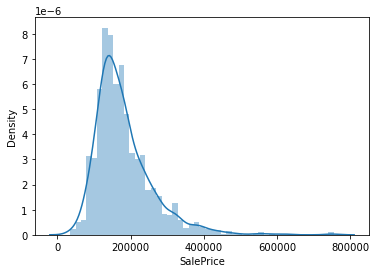

In [42]:
sns.distplot(houses['SalePrice'])

In [43]:
# creating function for Catagorical Column Plotting 
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = houses[[col_i]].nunique()
    plt.figure(figsize=(variables,variables))
    my_order = houses[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=houses[[col_i,col_o]], order=my_order.index)

In [44]:
catagorical_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

<Figure size 432x288 with 0 Axes>

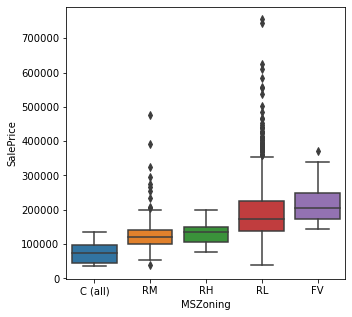

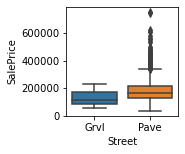

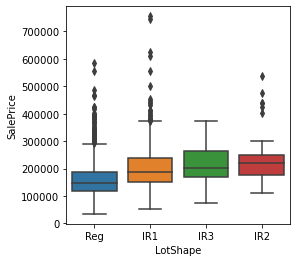

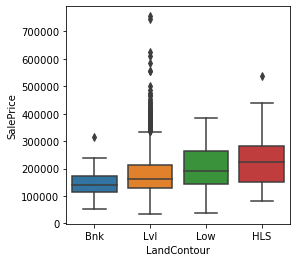

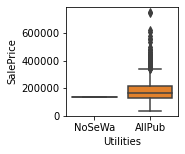

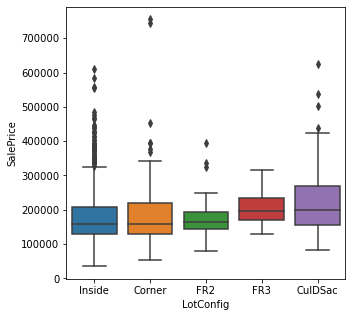

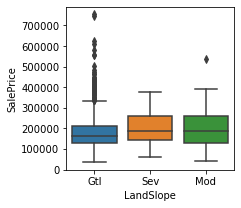

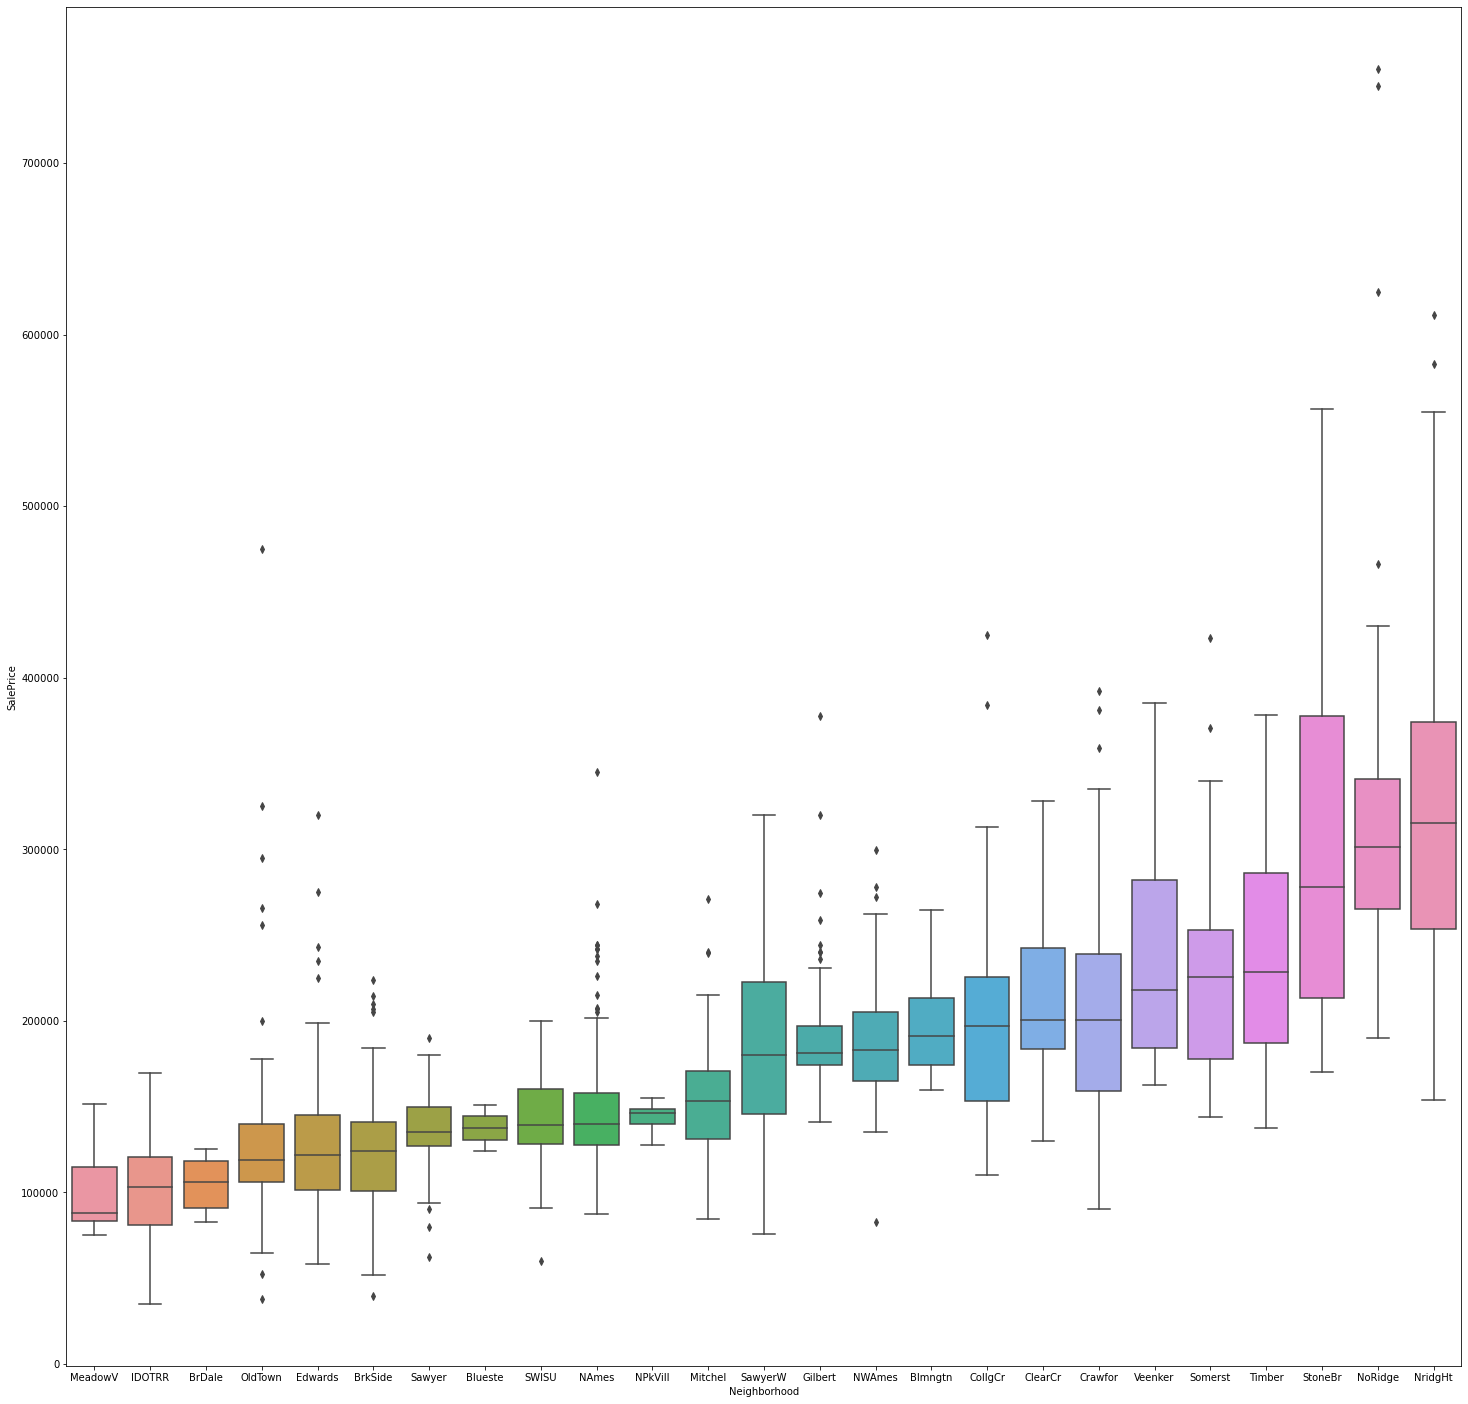

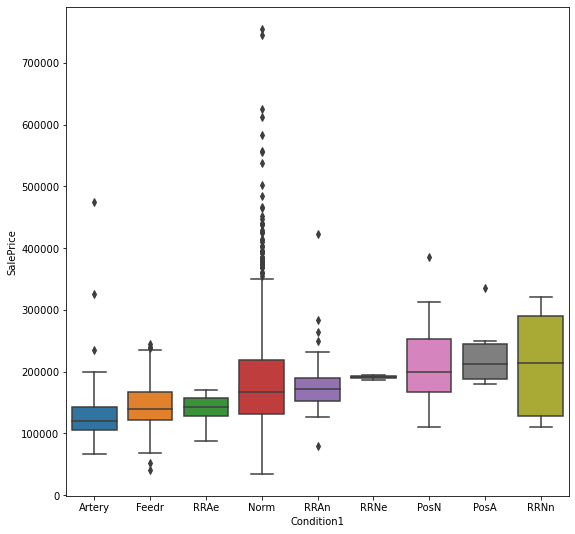

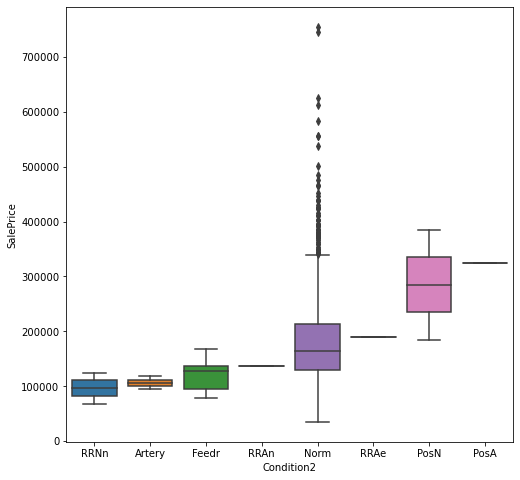

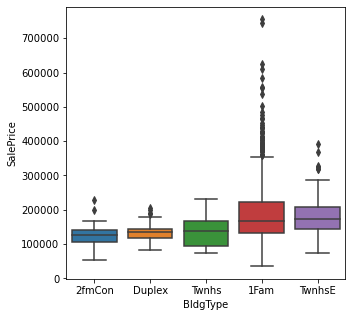

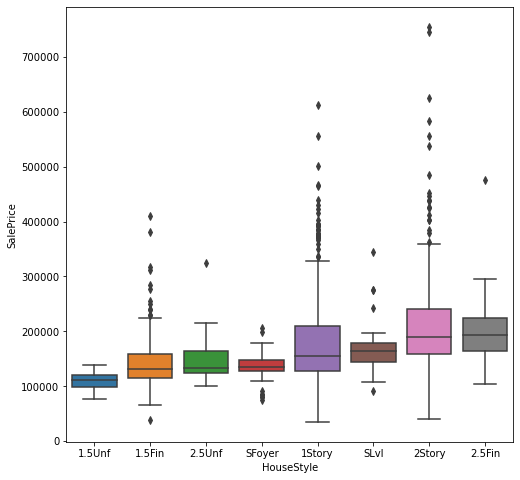

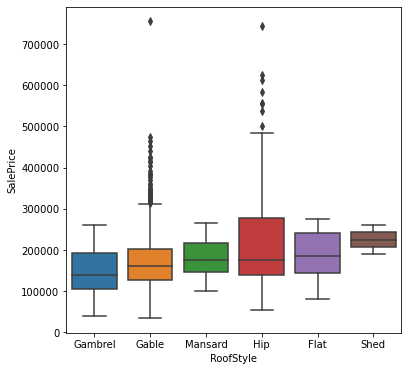

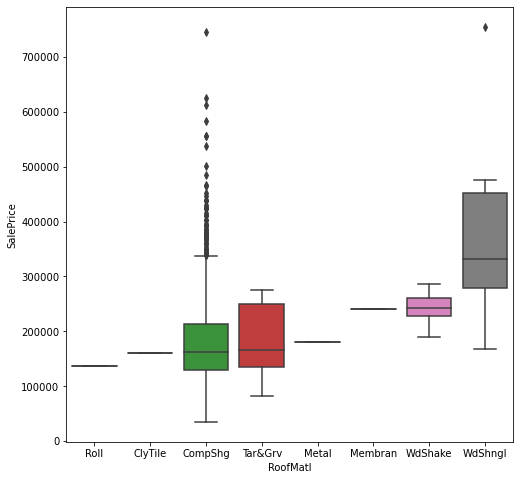

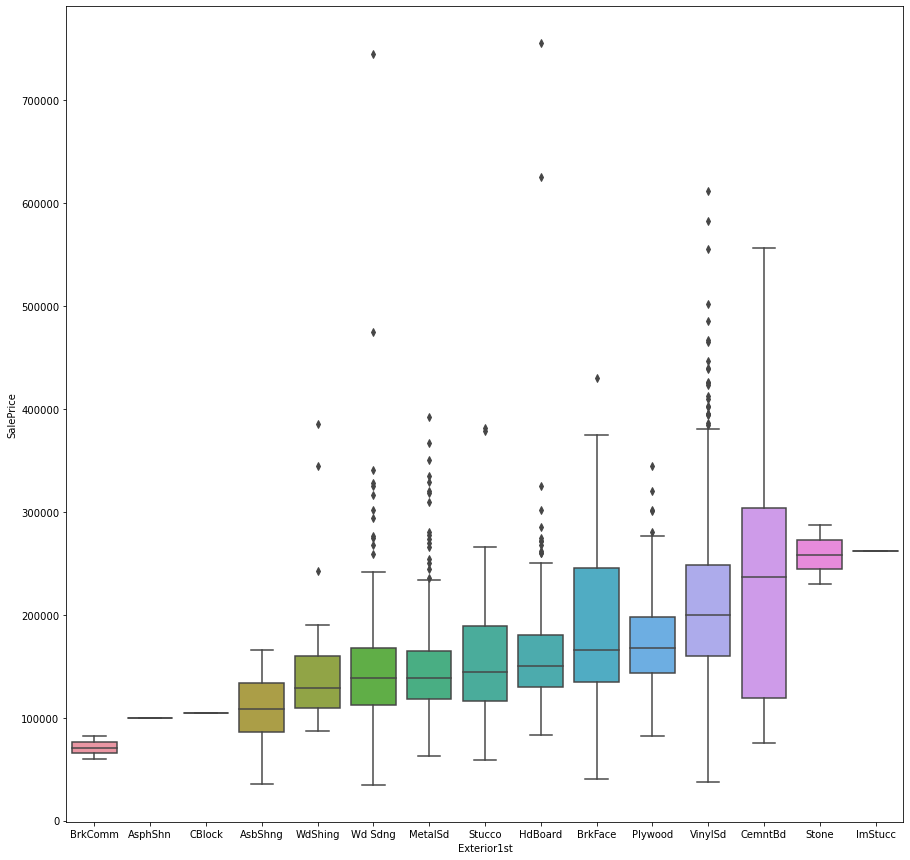

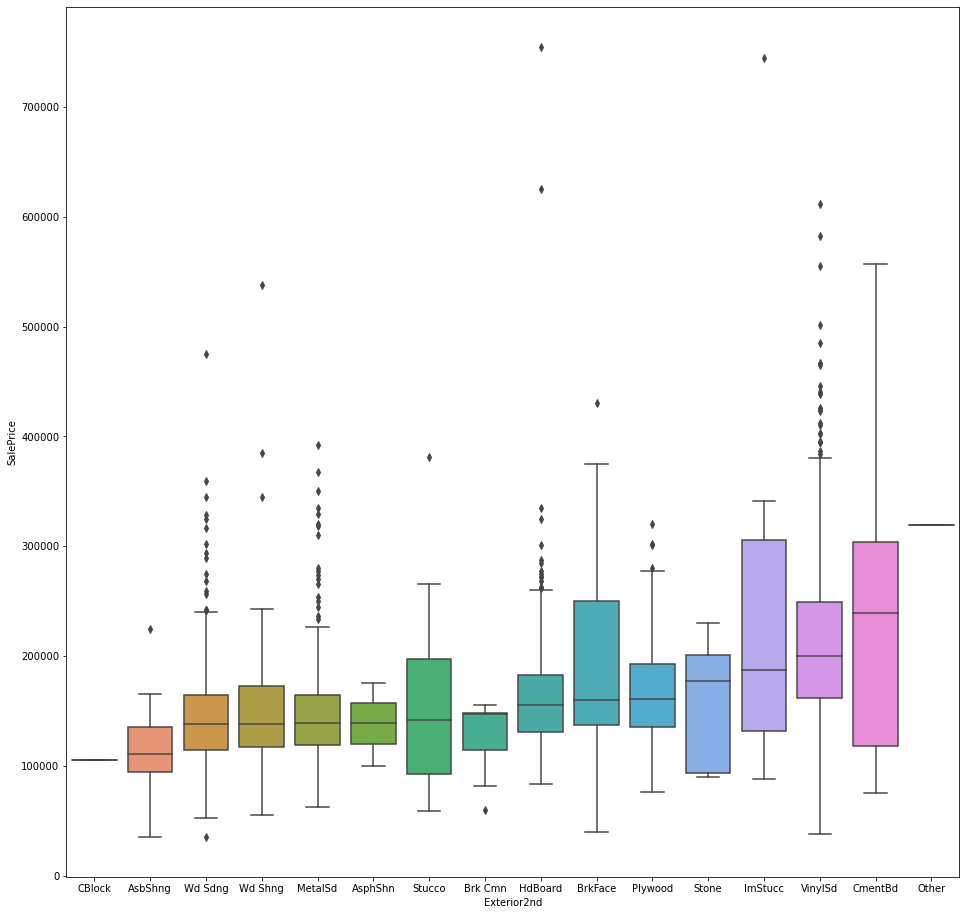

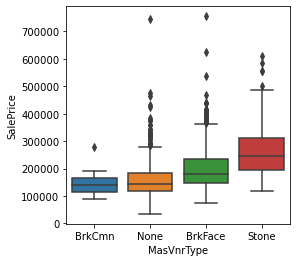

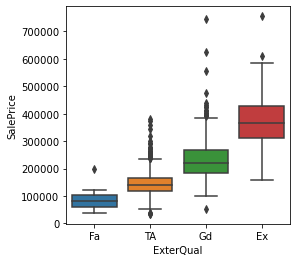

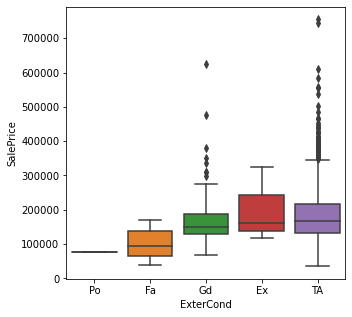

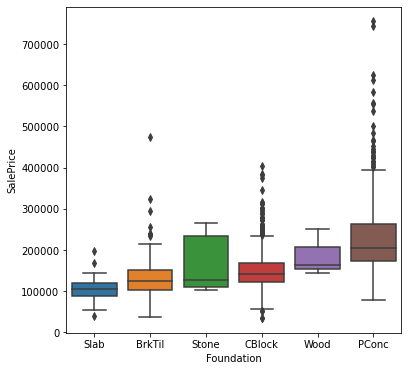

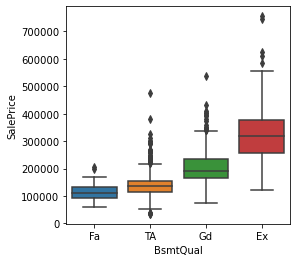

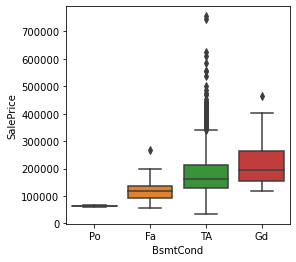

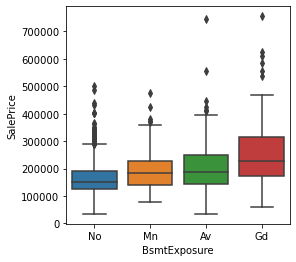

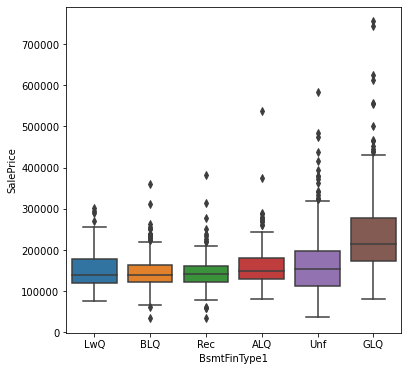

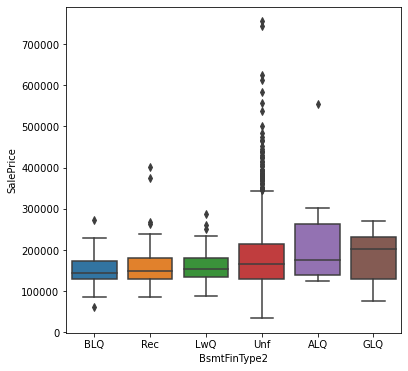

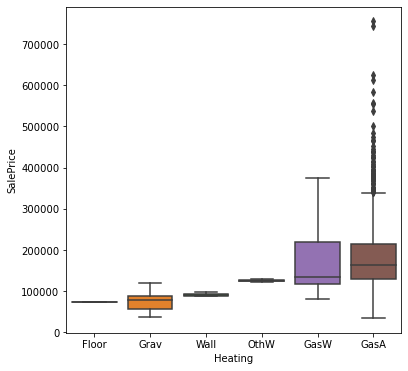

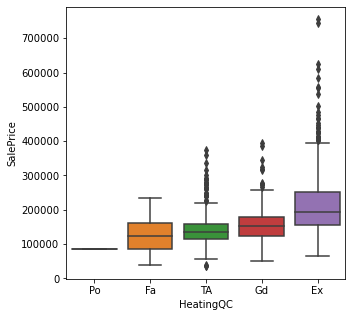

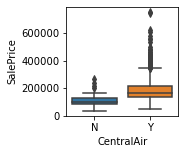

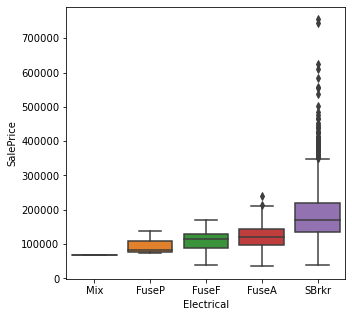

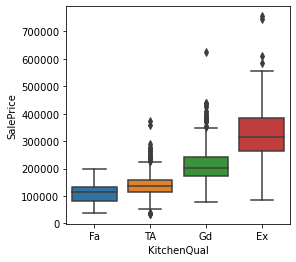

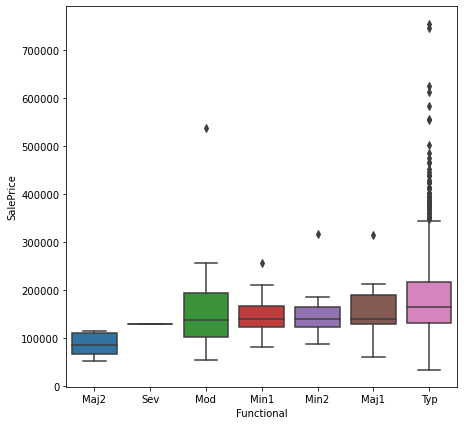

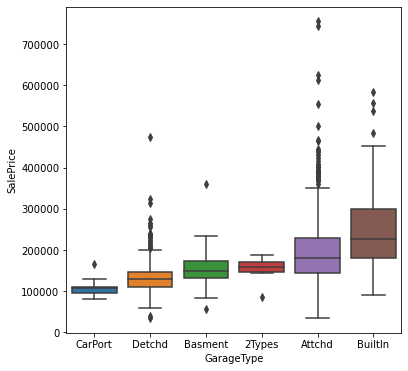

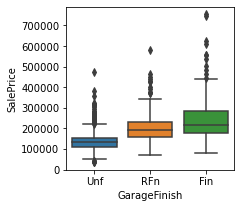

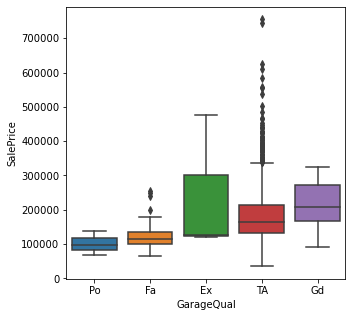

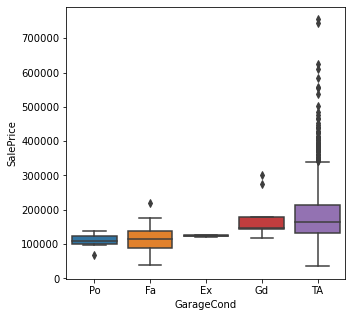

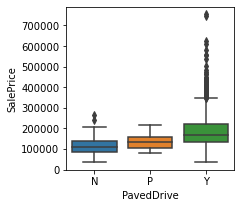

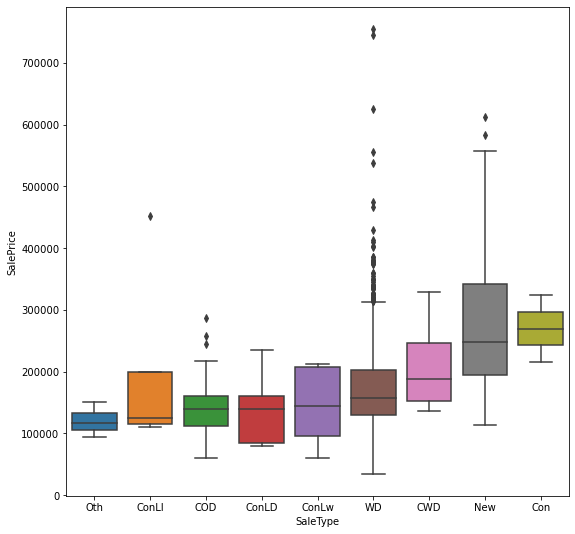

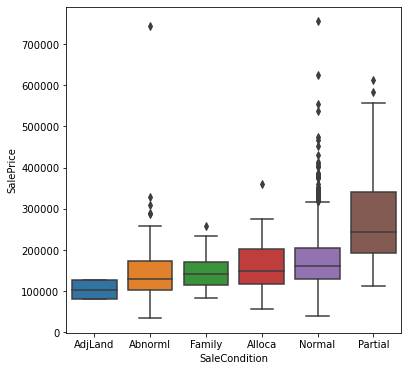

In [45]:
for i, col in enumerate(catagorical_col):
    cat_col_analysis(i, col, 'SalePrice')

In [46]:
# creating function for Numerical Column Plotting 
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=houses[[col_i,col_o]])

In [47]:
numerical_col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

<Figure size 432x288 with 0 Axes>

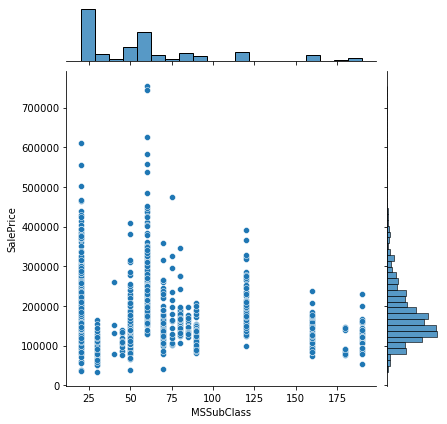

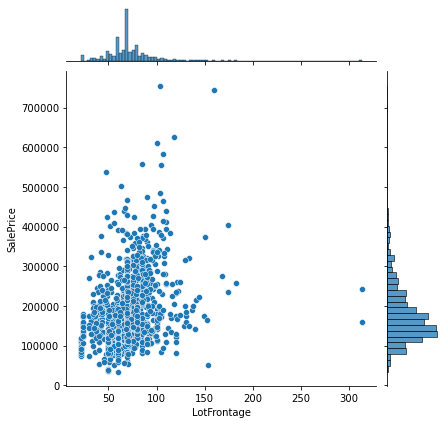

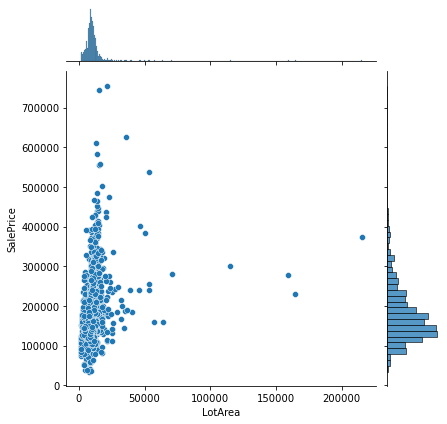

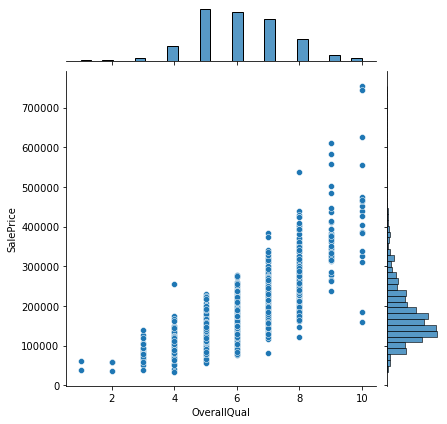

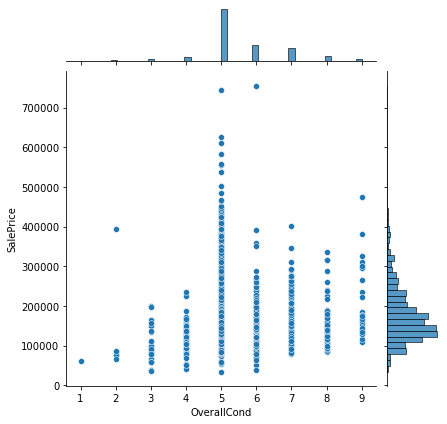

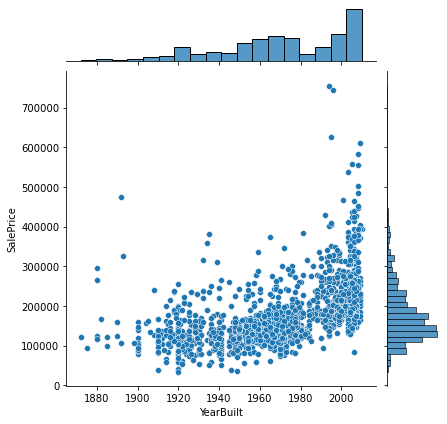

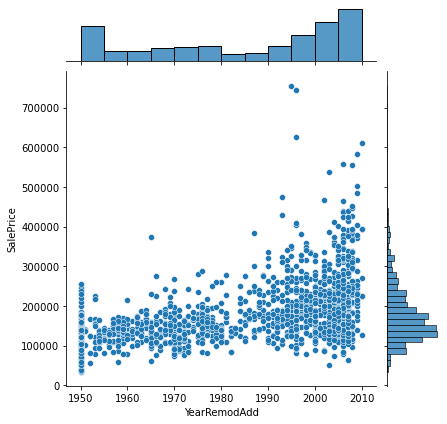

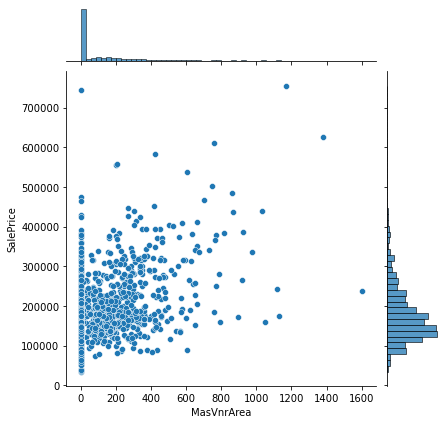

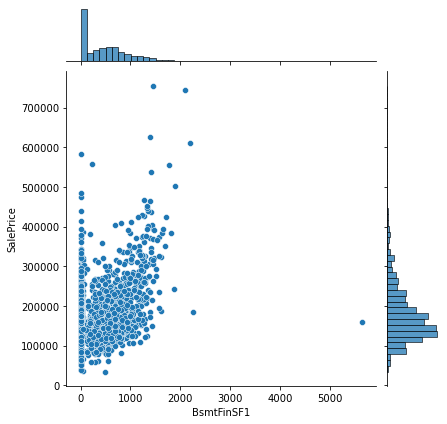

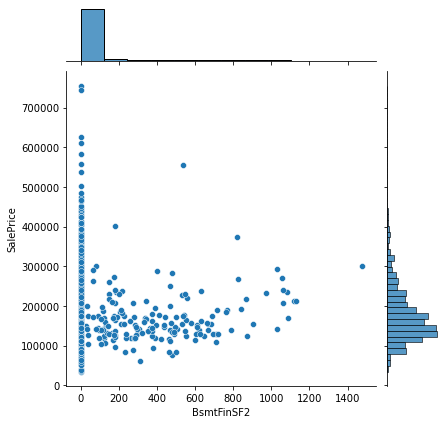

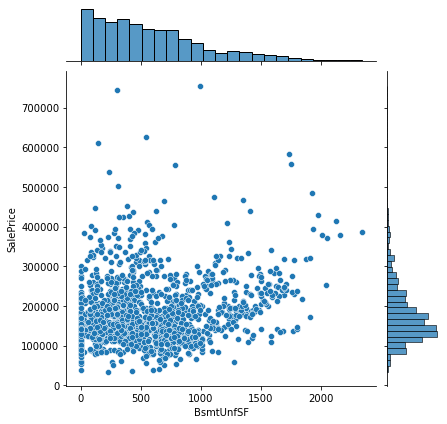

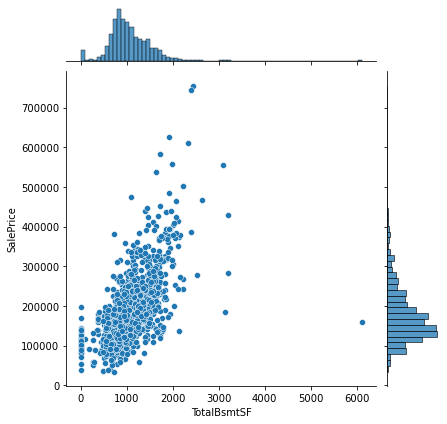

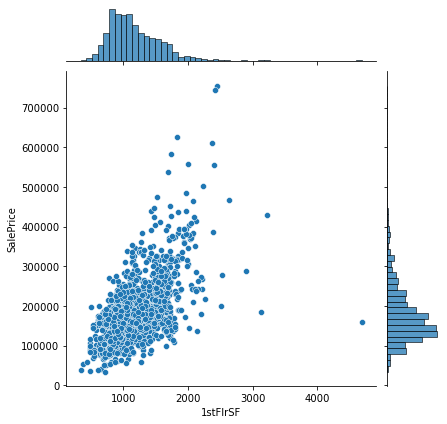

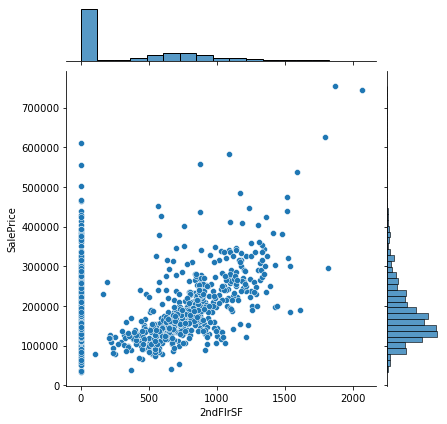

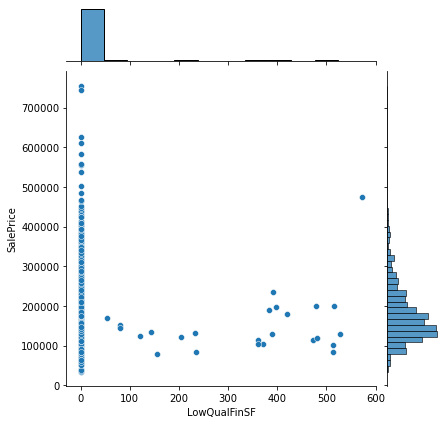

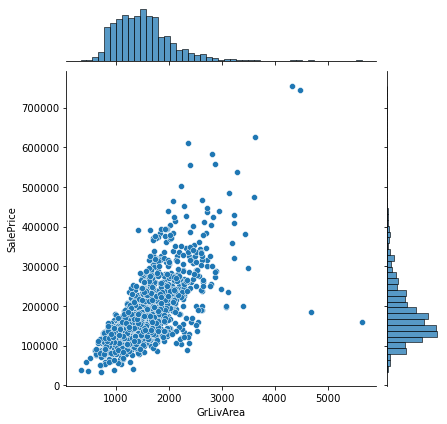

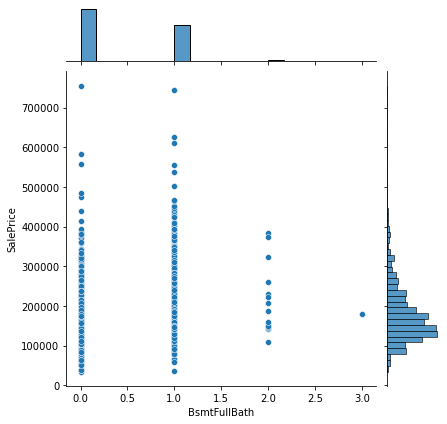

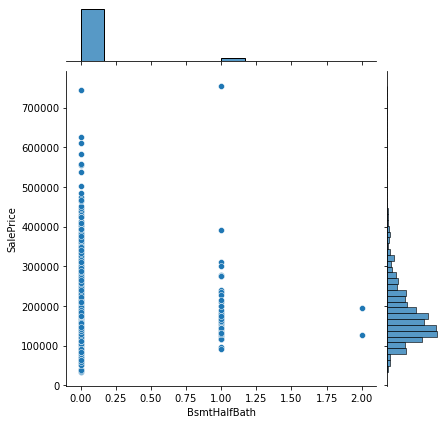

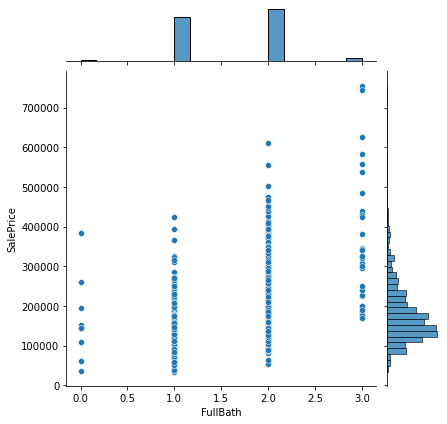

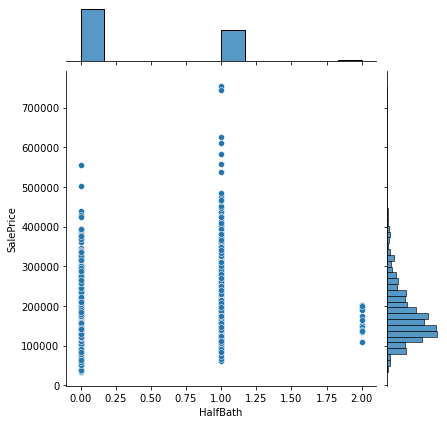

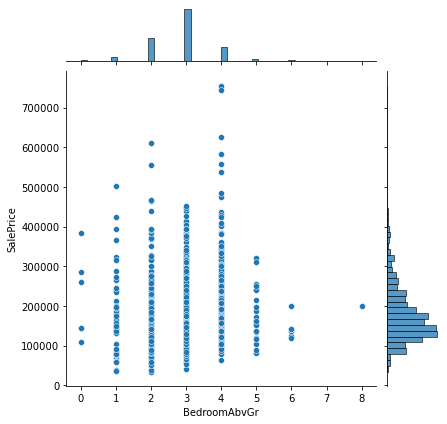

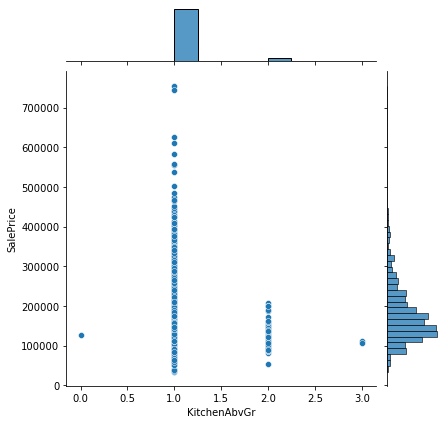

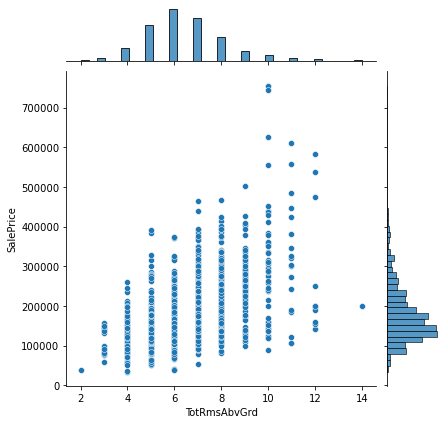

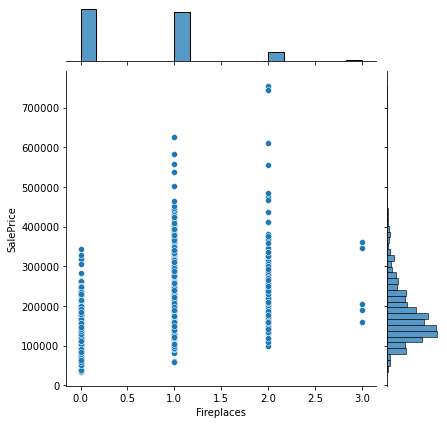

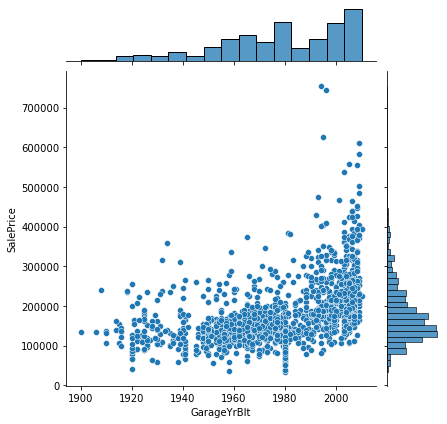

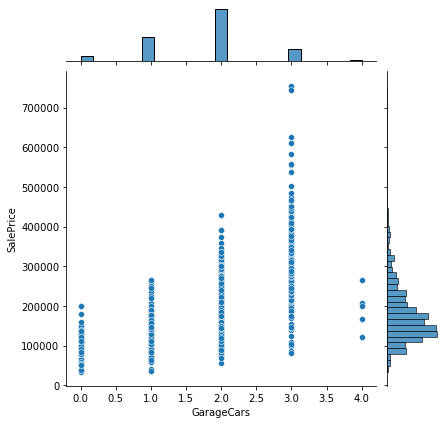

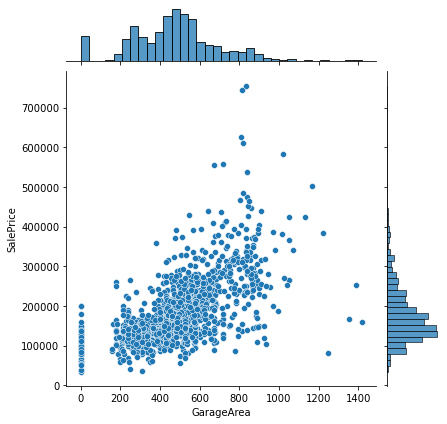

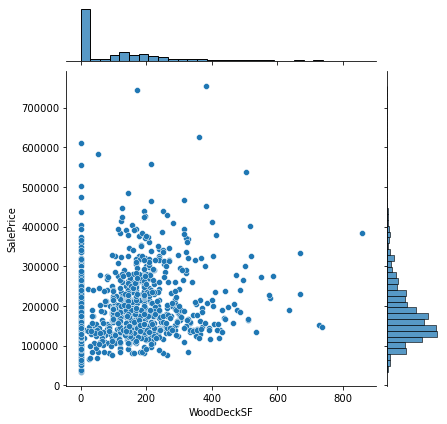

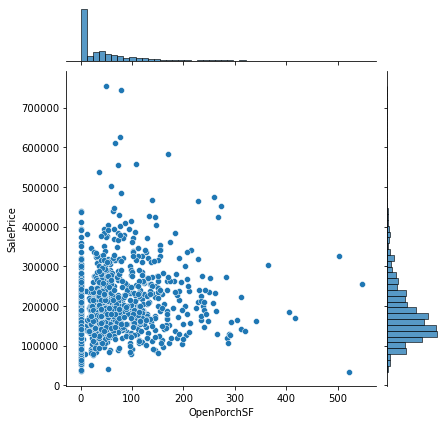

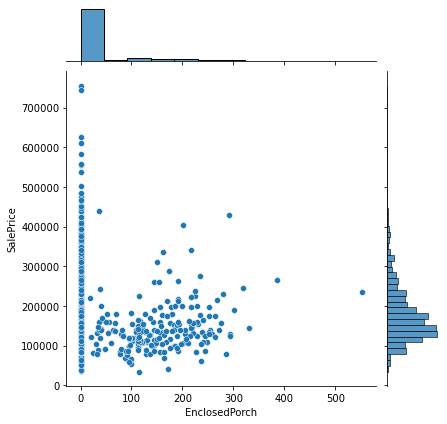

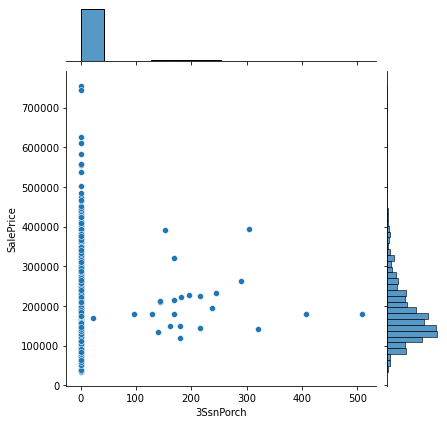

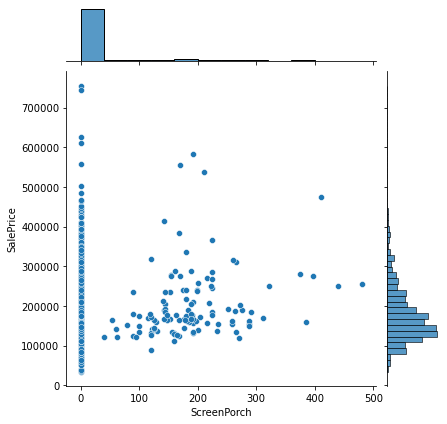

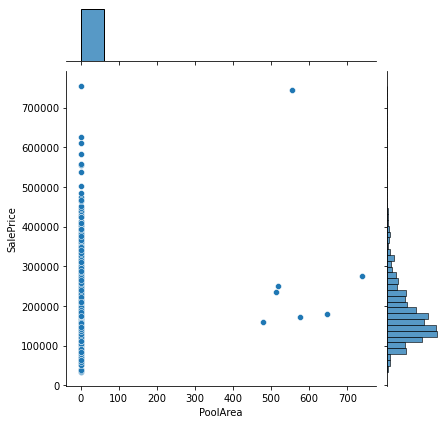

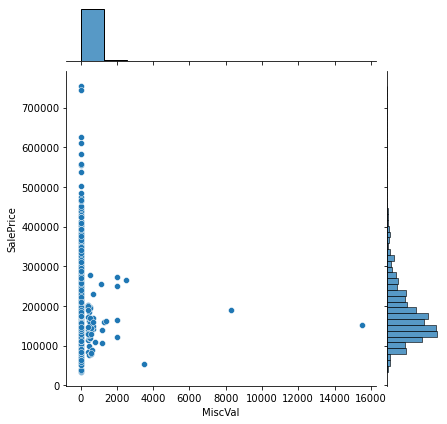

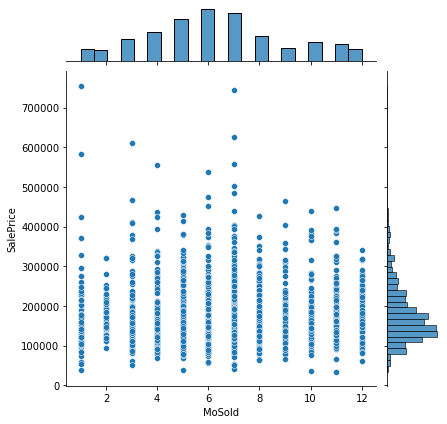

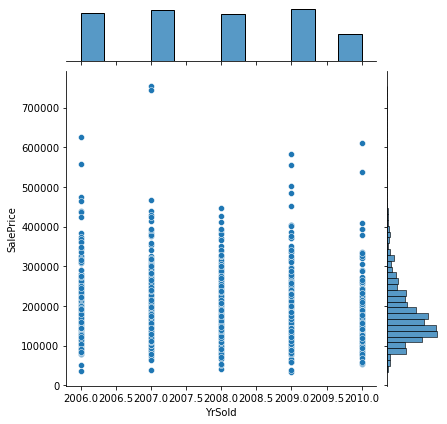

In [48]:
for i, col in enumerate(numerical_col):
    num_col_analysis(i, col, 'SalePrice')

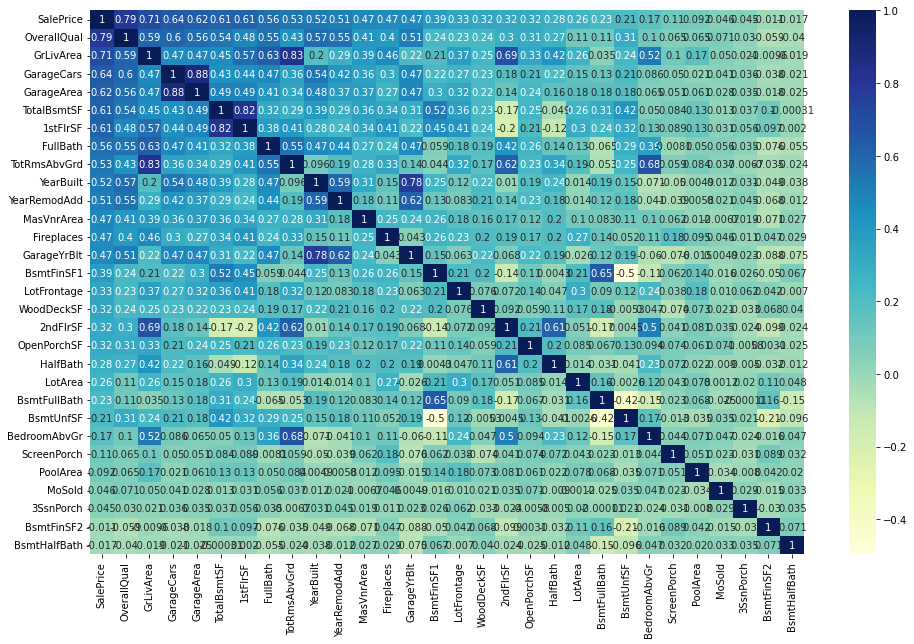

In [49]:
# Correlation matrix
plt.figure(figsize = (16, 10))
n = 30 # number of variables which have the highest correlation with 'Sales price'

corrmat = houses.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(houses[cols].corr(),annot=True ,  cmap="YlGnBu")
plt.show()

### Data Preperation for Model Building

#### Dummy Variable

In [50]:
houses=pd.get_dummies(houses,drop_first=True)
houses.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007     181500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008     223500            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0   
3      

In [51]:
houses.shape

(1460, 233)

#### Splitting the data into train and test sets

In [52]:
y = houses.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [53]:
X = houses
X.shape

(1460, 232)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [55]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
135           20         80.0    10400            7            6       1970          1970       288.0           0           0       1304         1304      1682         0             0       1682             0             0         2         0             3             1             7           1       1970.0           2         530          98            0              0          0            0         0        0       5    2008            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0   
1452         180         35.0     3675            5            5       2005          2005        80.0         547           0          0          547      1072         0             0       1072             1             0         1         0             2             1             5           0       2005.0           2         525           0           28              0          0            0         0        0       5    2006            0            0            0            1            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     1                     0                    0                     0                     0                   0                     0   
762           60         72.0     8640            7            5       2009          2009         0.0          24           0        732          756       764       783             0       1547             0             0         2         1             3             1             7           0       2009.0           2         614         169           45              0          0            0         0        0       6    2010            1            0            0            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0   
932           20         84.0    11670    

In [56]:
X_train.shape

(1022, 232)

In [57]:
X_test.shape

(438, 232)

In [58]:
y_train.shape

(1022,)

In [59]:
y_test.shape

(438,)

#### Scaling of numeric varaibles

In [60]:
X_train[numerical_col].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold
135           20         80.0    10400            7            6       1970          1970       288.0           0           0       1304         1304      1682         0             0       1682             0             0         2         0             3             1             7           1       1970.0           2         530          98            0              0          0            0         0        0       5    2008
1452         180         35.0     3675            5            5       2005          2005        80.0         547           0          0          547      1072         0             0       1072             1             0         1         0             2             1             5           0       2005.0           2         525           0           28              0          0            0         0        0       5    2006
762           60         72.0     8640            7            5       2009          2009         0.0          24           0        732          756       764       783             0       1547             0             0         2         1             3             1             7           0       2009.0           2         614         169           45              0          0            0         0        0       6    2010
932           20         84.0    11670            9            5       2006          2006       302.0           0           0       1905         1905      1905         0             0       1905             0             0         2         0             3             1             8           1       2006.0           3         788           0          191              0          0            0         0        0       3    2007
435           60         43.0    10667            7            6       1996          1996         0.0         385         344         70          799       827       834             0       1661             1             0         2         1             3             1             6           1       1996.0           2         550         158           61              0          0            0         0        0       4    2009

In [61]:
scaler=MinMaxScaler()

In [62]:
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col] = scaler.transform(X_test[numerical_col])

In [63]:
X_train[numerical_col].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold
135     0.000000     0.202055  0.042534     0.666667        0.625   0.710145      0.333333    0.208999    0.000000    0.000000   0.558219     0.213421  0.309316  0.000000           0.0   0.253956      0.000000           0.0  0.666667       0.0         0.375           0.5      0.416667    0.333333     0.636364        0.50    0.373766    0.114352     0.000000            0.0        0.0          0.0       0.0      0.0  0.363636    0.50
1452    0.941176     0.047945  0.011101     0.444444        0.500   0.963768      0.916667    0.058055    0.096917    0.000000   0.000000     0.089525  0.169344  0.000000           0.0   0.139035      0.333333           0.0  0.333333       0.0         0.250           0.5      0.250000    0.000000     0.954545        0.50    0.370240    0.000000     0.051188            0.0        0.0          0.0       0.0      0.0  0.363636    0.00
762     0.235294     0.174658  0.034308     0.666667        0.500   0.992754      0.983333    0.000000    0.004252    0.000000   0.313356     0.123732  0.098669  0.379177           0.0   0.228523      0.000000           0.0  0.666667       0.5         0.375           0.5      0.416667    0.000000     0.990909        0.50    0.433004    0.197200     0.082267            0.0        0.0          0.0       0.0      0.0  0.454545    1.00
932     0.000000     0.215753  0.048470     0.888889        0.500   0.971014      0.933333    0.219158    0.000000    0.000000   0.815497     0.311784  0.360486  0.000000           0.0   0.295968      0.000000           0.0  0.666667       0.0         0.375           0.5      0.500000    0.333333     0.963636        0.75    0.555712    0.000000     0.349177            0.0        0.0          0.0       0.0      0.0  0.181818    0.25
435     0.235294     0.075342  0.043782     0.666667        0.625   0.898551      0.766667    0.000000    0.068214    0.305235   0.029966     0.130769  0.113125  0.403874           0.0   0.250000      0.333333           0.0  0.666667       0.5         0.375           0.5      0.333333    0.333333     0.872727        0.50    0.387870    0.184364     0.111517            0.0        0.0          0.0       0.0      0.0  0.272727    0.75

### Model Building

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 75),
 ('LotFrontage', False, 105),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 8),
 ('YearBuilt', False, 7),
 ('YearRemodAdd', False, 47),
 ('MasVnrArea', False, 110),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 28),
 ('BsmtUnfSF', False, 29),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 17),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 56),
 ('BsmtHalfBath', False, 174),
 ('FullBath', False, 106),
 ('HalfBath', False, 188),
 ('BedroomAbvGr', False, 14),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 15),
 ('Fireplaces', False, 57),
 ('GarageYrBlt', False, 176),
 ('GarageCars', False, 164),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 89),
 ('OpenPorchSF', False, 202),
 ('EnclosedPorch', False, 206),
 ('3SsnPorch', False, 25),
 ('ScreenPorch', False, 38),
 ('PoolArea', False, 2),
 ('MiscVal', False, 58),
 ('MoSold', False, 146),
 ('YrSold', False, 208),
 ('MSZ

In [66]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Functional_Sev', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA'], dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=207)

In [68]:
X_train1=X_train[rfe_col]
X_test1=X_test[rfe_col]
X_train1.shape

(1022, 25)

In [69]:
X_test1.shape

(438, 25)

In [70]:
y_train.shape

(1022,)

In [71]:
y_test.shape

(438,)

In [72]:
lm1=lm.fit(X_train, y_train)

In [73]:
lm1.intercept_

-670267.3072407045

In [74]:
lm1.coef_

array([ 1.67481730e+04,  1.35946064e+04,  1.33295532e+05,  6.47587374e+04,
        4.15484707e+04,  4.36058355e+04,  8.48951504e+03,  2.37315868e+04,
        1.56055929e+17,  3.11614159e+16,  6.45901221e+16, -1.68940773e+17,
        1.42054696e+16,  6.73113695e+15,  1.86450864e+15, -1.73021186e+16,
        7.65612500e+03, -2.91937500e+03,  1.23540000e+04,  1.96600000e+03,
       -2.40822500e+04, -2.57405000e+04,  1.88860000e+04,  1.02610000e+04,
        2.58000000e+03,  2.91300000e+03,  3.84850000e+04,  1.01881250e+04,
       -1.25000000e+02,  1.23000000e+02,  2.48440000e+04,  1.50715000e+04,
        7.94507500e+04, -1.61752500e+04, -4.58250000e+03, -6.60000000e+01,
        3.27500000e+04,  1.99960000e+04,  2.16480000e+04,  2.11800000e+04,
        2.20995000e+04,  3.37050000e+03,  6.67450000e+03,  1.88800000e+03,
        1.69580000e+04, -7.22956250e+03,  6.23200000e+03, -2.34680000e+04,
        9.41225000e+03, -7.73375000e+03, -2.25560000e+04,  7.80000000e+01,
        3.92200000e+03, -

In [75]:
model_parameter = list(lm1.coef_)
model_parameter.insert(0,lm1.intercept_)
cols = X_train1.columns
cols.insert(0,'constant')
lm1.coef = pd.DataFrame(list(zip(cols,model_parameter)))
lm1.coef.columns = ['Feaure','Coef']

In [76]:
lm1.coef.sort_values(by='Coef',ascending=False).head(10)

Feaure          Coef
9    Condition2_PosN  1.560559e+17
11    RoofMatl_Metal  6.459012e+16
10  RoofMatl_CompShg  3.116142e+16
13  RoofMatl_Tar&Grv  1.420547e+16
14  RoofMatl_WdShake  6.731137e+15
15  RoofMatl_WdShngl  1.864509e+15
3        TotalBsmtSF  1.332955e+05
4           1stFlrSF  6.475874e+04
6          GrLivArea  4.360584e+04
5           2ndFlrSF  4.154847e+04

In [77]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8297214788719192
0.6602031920249742
1047380480833.1345
1038556685744.3169
1024834129.9737128
2371133985.7176185


### Ridge Regression

In [78]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
ridge_model_cv.best_params_

{'alpha': 1.0}

In [80]:
ridge_model_cv.best_score_

-23678.630562283342

In [81]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([  82405.42210451,  215589.35630025,   95287.99238478,
         61801.13198305,  128016.1442762 ,   46467.42571315,
        111313.97950897,  -53443.41879156,   84076.99064383,
       -108891.33123401,   94040.69761128,   51699.68253913,
         48598.51422158,   86885.5170009 ,   66684.61391435,
         92458.71419587,  -44301.68651677,  -25078.02680244,
         -2154.27448817,  -13452.83985904,  -12541.06930695,
          9708.57079933,    9895.63753456,    4325.34558083,
         11517.50986028])

In [82]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train1.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [83]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure           Coef
2         BsmtFinSF1  215589.356300
5           2ndFlrSF  128016.144276
7       KitchenAbvGr  111313.979509
3        TotalBsmtSF   95287.992385
11    RoofMatl_Metal   94040.697611
16    Functional_Sev   92458.714196
14  RoofMatl_WdShake   86885.517001
9    Condition2_PosN   84076.990644
1        OverallQual   82405.422105
15  RoofMatl_WdShngl   66684.613914

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7797115627502693
0.8064619173939177
1354990681150.2925
591530776391.0946
1325822584.2957852
1350526886.737659


#### Lasso Regression

In [85]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
lasso_model_cv.best_params_

{'alpha': 50}

In [87]:
lasso_model_cv.best_score_

-23923.086668697295

In [88]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=50)

In [89]:
lasso.coef_

array([  91682.4870869 ,  220773.4692484 ,  121385.93052478,
         49269.91043069,  168560.44931159,   56013.48350946,
         96148.42693728,  -53738.1311029 ,   79454.72274781,
       -152848.24372932,  266903.67733608,  224061.50905391,
        218690.30595824,  261157.27821625,  242906.81230115,
        273071.69787259,  -40747.85459795,  -11127.84897844,
          4195.35018007,      -0.        ,      -0.        ,
             0.        ,       0.        ,      -0.        ,
             0.        ])

In [90]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train1.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [91]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure           Coef
16    Functional_Sev  273071.697873
11    RoofMatl_Metal  266903.677336
14  RoofMatl_WdShake  261157.278216
15  RoofMatl_WdShngl  242906.812301
12     RoofMatl_Roll  224061.509054
2         BsmtFinSF1  220773.469248
13  RoofMatl_Tar&Grv  218690.305958
5           2ndFlrSF  168560.449312
3        TotalBsmtSF  121385.930525
7       KitchenAbvGr   96148.426937

In [92]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8032372625865918
0.7924124503806942
1210284474852.1453
634471638563.0547
1184231384.3954453
1448565384.8471568


In [93]:
metric2

[0.7797115627502693,
 0.8064619173939177,
 1354990681150.2925,
 591530776391.0946,
 36411.8467575566,
 36749.51546262425]

In [94]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.297215e-01      7.797116e-01      8.032373e-01
1   R2 Score (Test)       6.602032e-01      8.064619e-01      7.924125e-01
2       RSS (Train)       1.047380e+12      1.354991e+12      1.210284e+12
3        RSS (Test)       1.038557e+12      5.915308e+11      6.344716e+11
4       MSE (Train)       3.201303e+04      3.641185e+04      3.441266e+04
5        MSE (Test)       4.869429e+04      3.674952e+04      3.806002e+04

### Model Evaluation

In [95]:
ridge_pred = ridge.predict(X_test1)

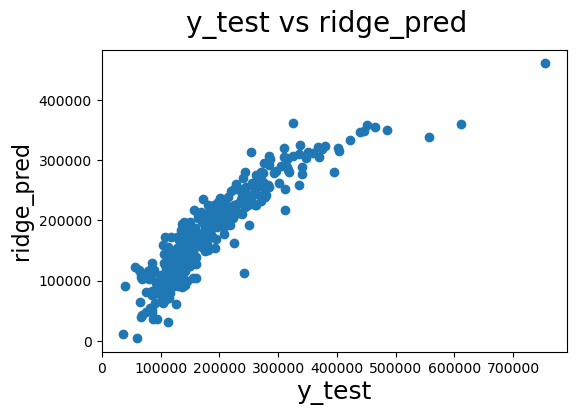

In [96]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

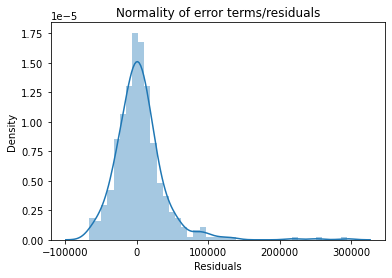

In [97]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [98]:
lasso_pred = lasso.predict(X_test1)

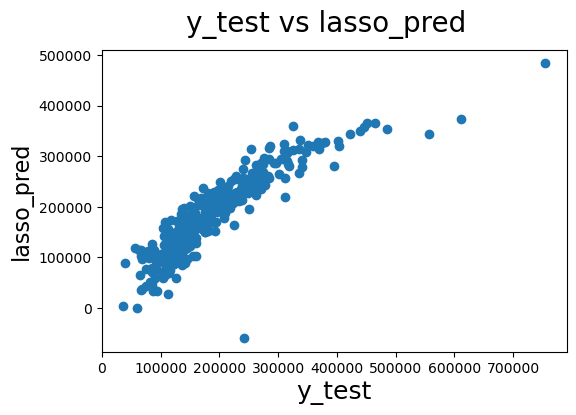

In [99]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

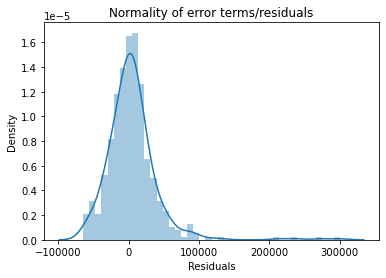

In [100]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Lets observe the changes in the coefficients after regularization

In [101]:
betas = pd.DataFrame(index=X_train1.columns)

In [102]:
betas.rows = X_train1.columns

In [103]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [104]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
LotArea            82405.422105   91682.487087
OverallQual       215589.356300  220773.469248
BsmtFinSF1         95287.992385  121385.930525
TotalBsmtSF        61801.131983   49269.910431
1stFlrSF          128016.144276  168560.449312
2ndFlrSF           46467.425713   56013.483509
GrLivArea         111313.979509   96148.426937
KitchenAbvGr      -53443.418792  -53738.131103
GarageArea         84076.990644   79454.722748
Condition2_PosN  -108891.331234 -152848.243729
RoofMatl_CompShg   94040.697611  266903.677336
RoofMatl_Metal     51699.682539  224061.509054
RoofMatl_Roll      48598.514222  218690.305958
RoofMatl_Tar&Grv   86885.517001  261157.278216
RoofMatl_WdShake   66684.613914  242906.812301
RoofMatl_WdShngl   92458.714196  273071.697873
Functional_Sev    -44301.686517  -40747.854598
GarageQual_Fa     -25078.026802  -11127.848978
GarageQual_Gd      -2154.274488    4195.350180
GarageQual_Po     -13452.839859      -0.000000
GarageQual_TA     -12541.069307      -0.000000
GarageCond_Fa       9708.570799       0.000000
GarageCond_Gd       9895.637535       0.000000
GarageCond_Po       4325.345581      -0.000000
GarageCond_TA      11517.509860       0.000000

## Summary

#### Below are list variables are significant in predicting the price of a house <br>

- Functional_Sev
- RoofMatl_Metal
- BsmtFinSF1
- 2ndFlrSF
- KitchenAbvGr
- TotalBsmtSF
- RoofMatl_WdShake
- Condition2_PosN
- OverallQual
- RoofMatl_WdShngl

#### How well those variables describe the price of a house. <br>

In [105]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.297215e-01      7.797116e-01      8.032373e-01
1   R2 Score (Test)       6.602032e-01      8.064619e-01      7.924125e-01
2       RSS (Train)       1.047380e+12      1.354991e+12      1.210284e+12
3        RSS (Test)       1.038557e+12      5.915308e+11      6.344716e+11
4       MSE (Train)       3.201303e+04      3.641185e+04      3.441266e+04
5        MSE (Test)       4.869429e+04      3.674952e+04      3.806002e+04

#### The optimal value of lambda for ridge and lasso regression .<br>
- Ridge Regression: 1 
- Lasso Regression : 50

## Part 2 Assignment Questions Solution 

#### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- Optimal alpha for Ridge : 1
- If we double alpha for Ridge : 2

In [106]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 68159.20404016, 208840.89754183,  83903.09398868,  66731.80468953,
       116368.23120401,  45945.45987209, 107882.28491395, -50432.41408885,
        87373.94295503, -76786.01009915,  54707.31578276,  21618.14579954,
        19171.68482332,  47108.35787509,  30863.0720174 ,  54862.00341033,
       -28959.01474422, -19304.20918295,   3321.89365581,  -7843.7782419 ,
        -6955.26301133,   3788.12150635,   5990.60841127,    218.67216557,
         7810.23550881])

In [107]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train1.columns
cols.insert(0,'constant')
doublealpharidge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
doublealpharidge_coef.columns = ['Feaure','Coef']

In [118]:
doublealpharidge_coef.sort_values(by='Coef',ascending=False).head(30)

Feaure           Coef
2         BsmtFinSF1  208840.897542
5           2ndFlrSF  116368.231204
7       KitchenAbvGr  107882.284914
9    Condition2_PosN   87373.942955
3        TotalBsmtSF   83903.093989
1        OverallQual   68159.204040
4           1stFlrSF   66731.804690
16    Functional_Sev   54862.003410
11    RoofMatl_Metal   54707.315783
14  RoofMatl_WdShake   47108.357875
6          GrLivArea   45945.459872
15  RoofMatl_WdShngl   30863.072017
12     RoofMatl_Roll   21618.145800
13  RoofMatl_Tar&Grv   19171.684823
23     GarageCond_Po    5990.608411
22     GarageCond_Gd    3788.121506
19     GarageQual_Po    3321.893656
24     GarageCond_TA     218.672166
21     GarageCond_Fa   -6955.263011
20     GarageQual_TA   -7843.778242
18     GarageQual_Gd  -19304.209183
17     GarageQual_Fa  -28959.014744
8         GarageArea  -50432.414089
0            LotArea  -71154.141553
10  RoofMatl_CompShg  -76786.010099

In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7702482059027707
0.803067736234553
1413199638918.8015
601904768885.8821
1382778511.6622324
1374211801.10932


- Optimal alpha for lasso : 50
- If we double alpha for lasso : 100

In [110]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=100)

In [111]:
lasso.coef_

array([  79568.53673205,  235053.30391468,   98467.31439348,
          2030.88304874,   67046.81226855,       0.        ,
        211188.42905695,  -47456.73353519,   81616.99468112,
       -110245.4159559 ,   34878.0707514 ,       0.        ,
             0.        ,   21086.13278487,       0.        ,
         30369.83217147,      -0.        ,  -10783.02982636,
           345.2761207 ,      -0.        ,      -0.        ,
            -0.        ,       0.        ,      -0.        ,
             0.        ])

In [112]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train1.columns
cols.insert(0,'constant')
doublealphalasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
doublealphalasso_coef.columns = ['Feaure','Coef']

In [117]:
doublealphalasso_coef.sort_values(by='Coef',ascending=False).head(30)

Feaure           Coef
2         BsmtFinSF1  235053.303915
7       KitchenAbvGr  211188.429057
3        TotalBsmtSF   98467.314393
9    Condition2_PosN   81616.994681
1        OverallQual   79568.536732
5           2ndFlrSF   67046.812269
11    RoofMatl_Metal   34878.070751
16    Functional_Sev   30369.832171
14  RoofMatl_WdShake   21086.132785
4           1stFlrSF    2030.883049
19     GarageQual_Po     345.276121
20     GarageQual_TA      -0.000000
12     RoofMatl_Roll       0.000000
21     GarageCond_Fa      -0.000000
17     GarageQual_Fa      -0.000000
23     GarageCond_Po       0.000000
22     GarageCond_Gd      -0.000000
24     GarageCond_TA      -0.000000
15  RoofMatl_WdShngl       0.000000
13  RoofMatl_Tar&Grv       0.000000
6          GrLivArea       0.000000
18     GarageQual_Gd  -10783.029826
8         GarageArea  -47456.733535
0            LotArea  -61332.482864
10  RoofMatl_CompShg -110245.415956

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7685947683866544
0.805383972730524
1423369906837.4126
594825411922.5509
1392729850.1344545
1358048885.6679244


In [115]:
metric2

[0.7702482059027707,
 0.803067736234553,
 1413199638918.8015,
 601904768885.8821,
 37185.72994661033,
 37070.36284027066]

In [116]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Double Alpha Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Double Alpha Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Double Alpha Ridge Regression  Double Alpha Lasso Regression
0  R2 Score (Train)       8.297215e-01                   7.702482e-01                   7.685948e-01
1   R2 Score (Test)       6.602032e-01                   8.030677e-01                   8.053840e-01
2       RSS (Train)       1.047380e+12                   1.413200e+12                   1.423370e+12
3        RSS (Test)       1.038557e+12                   6.019048e+11                   5.948254e+11
4       MSE (Train)       3.201303e+04                   3.718573e+04                   3.731930e+04
5        MSE (Test)       4.869429e+04                   3.707036e+04                   3.685171e+04

Predictors are same but the co-efficent is reducing or its getting 0

### Question:3 Remove top five preditors and build Lasso Regression 

Droping below 5 predictors<br>

- Functional_Sev
- RoofMatl_Metal
- RoofMatl_WdShake
- RoofMatl_WdShngl
- RoofMatl_Roll

In [119]:
X_train1

LotArea  OverallQual  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  KitchenAbvGr  GarageArea  Condition2_PosN  RoofMatl_CompShg  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Functional_Sev  GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_Po  GarageCond_TA
135   0.042534     0.666667    0.000000     0.213421  0.309316  0.000000   0.253956           0.5    0.373766                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
1452  0.011101     0.444444    0.096917     0.089525  0.169344  0.000000   0.139035           0.5    0.370240                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
762   0.034308     0.666667    0.004252     0.123732  0.098669  0.379177   0.228523           0.5    0.433004                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
932   0.048470     0.888889    0.000000     0.311784  0.360486  0.000000   0.295968           0.5    0.555712                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
435   0.043782     0.666667    0.068214     0.130769  0.113125  0.403874   0.250000           0.5    0.387870                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
629   0.036084     0.555556    0.110560     0.204255  0.233134  0.000000   0.191409           0.5    0.366714                0                 0               0              0                 0                 0                 1               0              0              0              0              1              0              0              0              1
1210  0.046358     0.555556    0.000000     0.172668  0.165443  0.382567   0.284665           0.5    0.325811                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
1118  0.058543     0.444444    0.000000     0.087234  0.157641  0.280872   0.238696           0.5    0.211566                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
1084  0.054832     0.555556    0.104890     0.113093  0.081918  0.390799   0.219292           0.5    0.288434                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0              0              1
158   0.052593     0.666667    0.039334     0.162193  0.150757  0.462954   0.303881           0.5    0.478138                0                 1               0              0                 0                 0                 0               0              0              0              0              1              0              0            

In [120]:
y_train

135     174000
1452    145000
762     215200
932     320000
435     212000
629     168500
1210    189000
1118    140000
1084    187500
158     254900
967     135000
1259    151000
551     112500
497     184000
1031    197000
1262    161500
1013     85000
1311    203000
566     325000
610     313000
1278    237000
1263    180500
816     137000
438      90350
940     150900
96      214000
560     121500
1182    745000
471     190000
1004    181000
410      60000
963     239000
582     118500
156     109500
594     110000
617     105500
447     199900
1205    271900
861     131500
1010    135000
390     119000
1409    215000
847     133500
1284    169000
615     137500
613     147000
1303    232000
486     156000
561     170000
308      82500
461     155000
1142    424870
730     236500
1155    218000
1203    213000
700     312500
849     187000
1260    181000
787     233000
352      95000
710      52000
124     181000
178     501837
287      88000
1407    112000
1208    140000
294     16

In [121]:
X_train2 = X_train1.drop(['Functional_Sev','RoofMatl_Metal','RoofMatl_WdShake','RoofMatl_WdShngl','RoofMatl_Roll'],axis=1)
X_test2 = X_test1.drop(['Functional_Sev','RoofMatl_Metal','RoofMatl_WdShake','RoofMatl_WdShngl','RoofMatl_Roll'],axis=1)

In [122]:
X_train2.head()

LotArea  OverallQual  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  KitchenAbvGr  GarageArea  Condition2_PosN  RoofMatl_CompShg  RoofMatl_Tar&Grv  GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_Po  GarageCond_TA
135   0.042534     0.666667    0.000000     0.213421  0.309316  0.000000   0.253956           0.5    0.373766                0                 1                 0              0              0              0              1              0              0              0              1
1452  0.011101     0.444444    0.096917     0.089525  0.169344  0.000000   0.139035           0.5    0.370240                0                 1                 0              0              0              0              1              0              0              0              1
762   0.034308     0.666667    0.004252     0.123732  0.098669  0.379177   0.228523           0.5    0.433004                0                 1                 0              0              0              0              1              0              0              0              1
932   0.048470     0.888889    0.000000     0.311784  0.360486  0.000000   0.295968           0.5    0.555712                0                 1                 0              0              0              0              1              0              0              0              1
435   0.043782     0.666667    0.068214     0.130769  0.113125  0.403874   0.250000           0.5    0.387870                0                 1                 0              0              0              0              1              0              0              0              1

In [123]:
X_test2

LotArea  OverallQual  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  KitchenAbvGr  GarageArea  Condition2_PosN  RoofMatl_CompShg  RoofMatl_Tar&Grv  GarageQual_Fa  GarageQual_Gd  GarageQual_Po  GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_Po  GarageCond_TA
892   0.033252     0.555556    0.117470     0.173322  0.168426  0.000000   0.138282           0.5    0.186178                0                 1                 0              0              0              0              1              0              0              0              1
1105  0.051209     0.777778    0.182849     0.239444  0.267554  0.543341   0.431047           0.5    0.502116                0                 1                 0              0              0              0              1              0              0              0              1
413   0.035804     0.444444    0.000000     0.164975  0.159247  0.000000   0.130746           0.5    0.253879                0                 1                 0              0              0              0              1              0              0              0              1
522   0.017294     0.555556    0.070695     0.164321  0.153740  0.319613   0.250565           0.5    0.296192                0                 1                 0              0              0              0              1              0              0              0              1
1036  0.054210     0.888889    0.181077     0.265139  0.295089  0.000000   0.242276           0.5    0.643159                0                 1                 0              0              0              0              1              0              0              0              1
614   0.000893     0.333333    0.026577     0.103110  0.067921  0.000000   0.055765           0.5    0.000000                0                 1                 0              0              0              0              1              0              0              0              1
218   0.067120     0.666667    0.060418     0.130606  0.184259  0.395642   0.305200           0.5    0.303949                0                 1                 0              0              0              0              1              0              0              0              1
1160  0.004581     0.555556    0.055103     0.139935  0.119550  0.291041   0.211379           0.5    0.310296                0                 1                 0              0              0              0              1              0              0              0              1
649   0.002973     0.333333    0.023210     0.103110  0.067921  0.000000   0.055765           0.5    0.000000                0                 1                 0              0              0              0              1              0              0              0              1
887   0.070887     0.444444    0.000000     0.133552  0.123451  0.252300   0.199510           0.5    0.211566                0                 1                 0              0              0              0              1              0              0              0              1
576   0.023333     0.666667    0.000000     0.140917  0.124598  0.290557   0.215335           0.5    0.152327                0                 1                 0              0              0              0              1              0              0              0              1
1252  0.040001     0.444444    0.090361     0.141408  0.123910  0.000000   0.101733           0.5    0.203103                0                 1                 0              0              0              0              1              0              0              0              1
1061  0.078057     0.222222    0.000000     0.146318  0.128499  0.000000   0.105501           0.5    0.880113                0                 1                 0              0              0              0              1              0              0              0              1
567   0.041464     0.666667    0.000354     0

In [124]:
alpha = 50
lassonew = Lasso(alpha=alpha)
lassonew.fit(X_train2, y_train) 

Lasso(alpha=50)

In [125]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonew.predict(X_train2)
y_pred_test = lassonew.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7693530714800833
0.8017997532732306
1418705596545.3623
605780238434.1069
1388165945.7391021
1383059905.1007009


In [126]:
lassonew.coef_

array([  94357.56996105,  233686.87842458,  102523.20752629,
         10040.70358104,  124710.26178074,   28024.49975953,
        146646.5529195 ,  -52572.13139482,   80523.79556358,
       -141472.1425889 ,   35675.28269546,   25552.70917902,
        -16661.27234906,       0.        ,      -0.        ,
         -4814.32303885,      -0.        ,       0.        ,
            -0.        ,     258.92681248])

In [127]:
model_parameter = list(lassonew.coef_)
model_parameter.insert(0,lassonew.intercept_)
cols = X_train1.columns
cols.insert(0,'constant')
lasso_coef_new = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef_new.columns = ['Feaure','Coef']

In [128]:
lasso_coef_new.sort_values(by='Coef',ascending=False).head(10)

Feaure           Coef
2        BsmtFinSF1  233686.878425
7      KitchenAbvGr  146646.552920
5          2ndFlrSF  124710.261781
3       TotalBsmtSF  102523.207526
1       OverallQual   94357.569961
9   Condition2_PosN   80523.795564
11   RoofMatl_Metal   35675.282695
6         GrLivArea   28024.499760
12    RoofMatl_Roll   25552.709179
4          1stFlrSF   10040.703581

#### Top 5 predictors <br>

- BsmtFinSF1
- KitchenAbvGr
- 2ndFlrSF
- TotalBsmtSF
- OverallQual